<a href="https://colab.research.google.com/github/325021079/tutorial-2-325021079/blob/main/parkinsons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Download the data from your GitHub repository
!wget https://raw.githubusercontent.com/yotam-biu/ps9/main/parkinsons.csv -O /content/parkinsons.csv
!wget https://raw.githubusercontent.com/yotam-biu/python_utils/main/lab_setup_do_not_edit.py -O /content/lab_setup_do_not_edit.py
import lab_setup_do_not_edit

--2025-12-28 17:16:59--  https://raw.githubusercontent.com/yotam-biu/ps9/main/parkinsons.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30202 (29K) [text/plain]
Saving to: ‘/content/parkinsons.csv’

/content/parkinsons 100%[===================>]  29.49K  --.-KB/s    in 0.003s  

2025-12-28 17:16:59 (10.3 MB/s) - ‘/content/parkinsons.csv’ saved [30202/30202]

--2025-12-28 17:16:59--  https://raw.githubusercontent.com/yotam-biu/python_utils/main/lab_setup_do_not_edit.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1579 (1.5K

In [19]:
#טעינת ושמירת הדאטה
import pandas as pd

df = pd.read_csv('parkinsons.csv')

#עיבוד הנתונים

df = df.dropna()
import numpy as np

# 1. חישוב מטריצת הקורלציה (בערך מוחלט)

corr_matrix = df.select_dtypes(include=[np.number]).corr().abs()

# 2. בחירת המשולש העליון של המטריצה

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 3. זיהוי עמודות למחיקה
# הסף הוא 0.95
threshold = 0.95
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print(f"Features to drop: {to_drop}")

# 4. עדכון דאטה פריים חדש ומסונן
df = df.drop(columns=to_drop)

df.head()

Features to drop: ['MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'PPE']


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:Shimmer,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2
0,phon_R01_S10_1,237.226,247.326,225.227,0.00298,0.00001,0.01752,0.00740,22.736,0,0.305062,0.654172,-7.310550,0.098648,2.416838
1,phon_R01_S44_6,149.818,163.417,144.786,0.00336,0.00002,0.02145,0.00595,23.008,1,0.329577,0.757180,-6.277170,0.109397,2.209021
2,phon_R01_S49_2,116.848,217.552,99.503,0.00531,0.00005,0.01795,0.01179,22.085,0,0.663842,0.656516,-5.198864,0.206768,2.120412
3,phon_R01_S26_1,193.030,208.900,80.297,0.00766,0.00004,0.03044,0.00947,21.934,1,0.497554,0.740539,-5.845099,0.278679,2.608749
4,phon_R01_S32_4,120.256,125.306,104.773,0.00407,0.00003,0.01516,0.01015,26.017,1,0.468621,0.735136,-6.112667,0.217013,2.527742




## 1. **Load the dataset:**  

   After running the first cell of this notebook, the file `parkinson.csv` will appear in the `Files` folder.
   You need to loaded the file as a DataFrame.  




## 2. **Select features:**  

   - Choose **two features** as inputs for the model.  
   - Identify **one feature** to use as the output for the model.  

  #### Advice:  
  - You can refer to the paper available in the GitHub repository for insights into the dataset and guidance on identifying key features for the input and output.  
  - Alternatively, consider creating pair plots or using other EDA methods we learned in the last lecture to explore the relationships between features and determine which ones are most relevant.  


In [20]:
#שמות המשתנים
print(df.columns.to_list())

['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:Shimmer', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2']


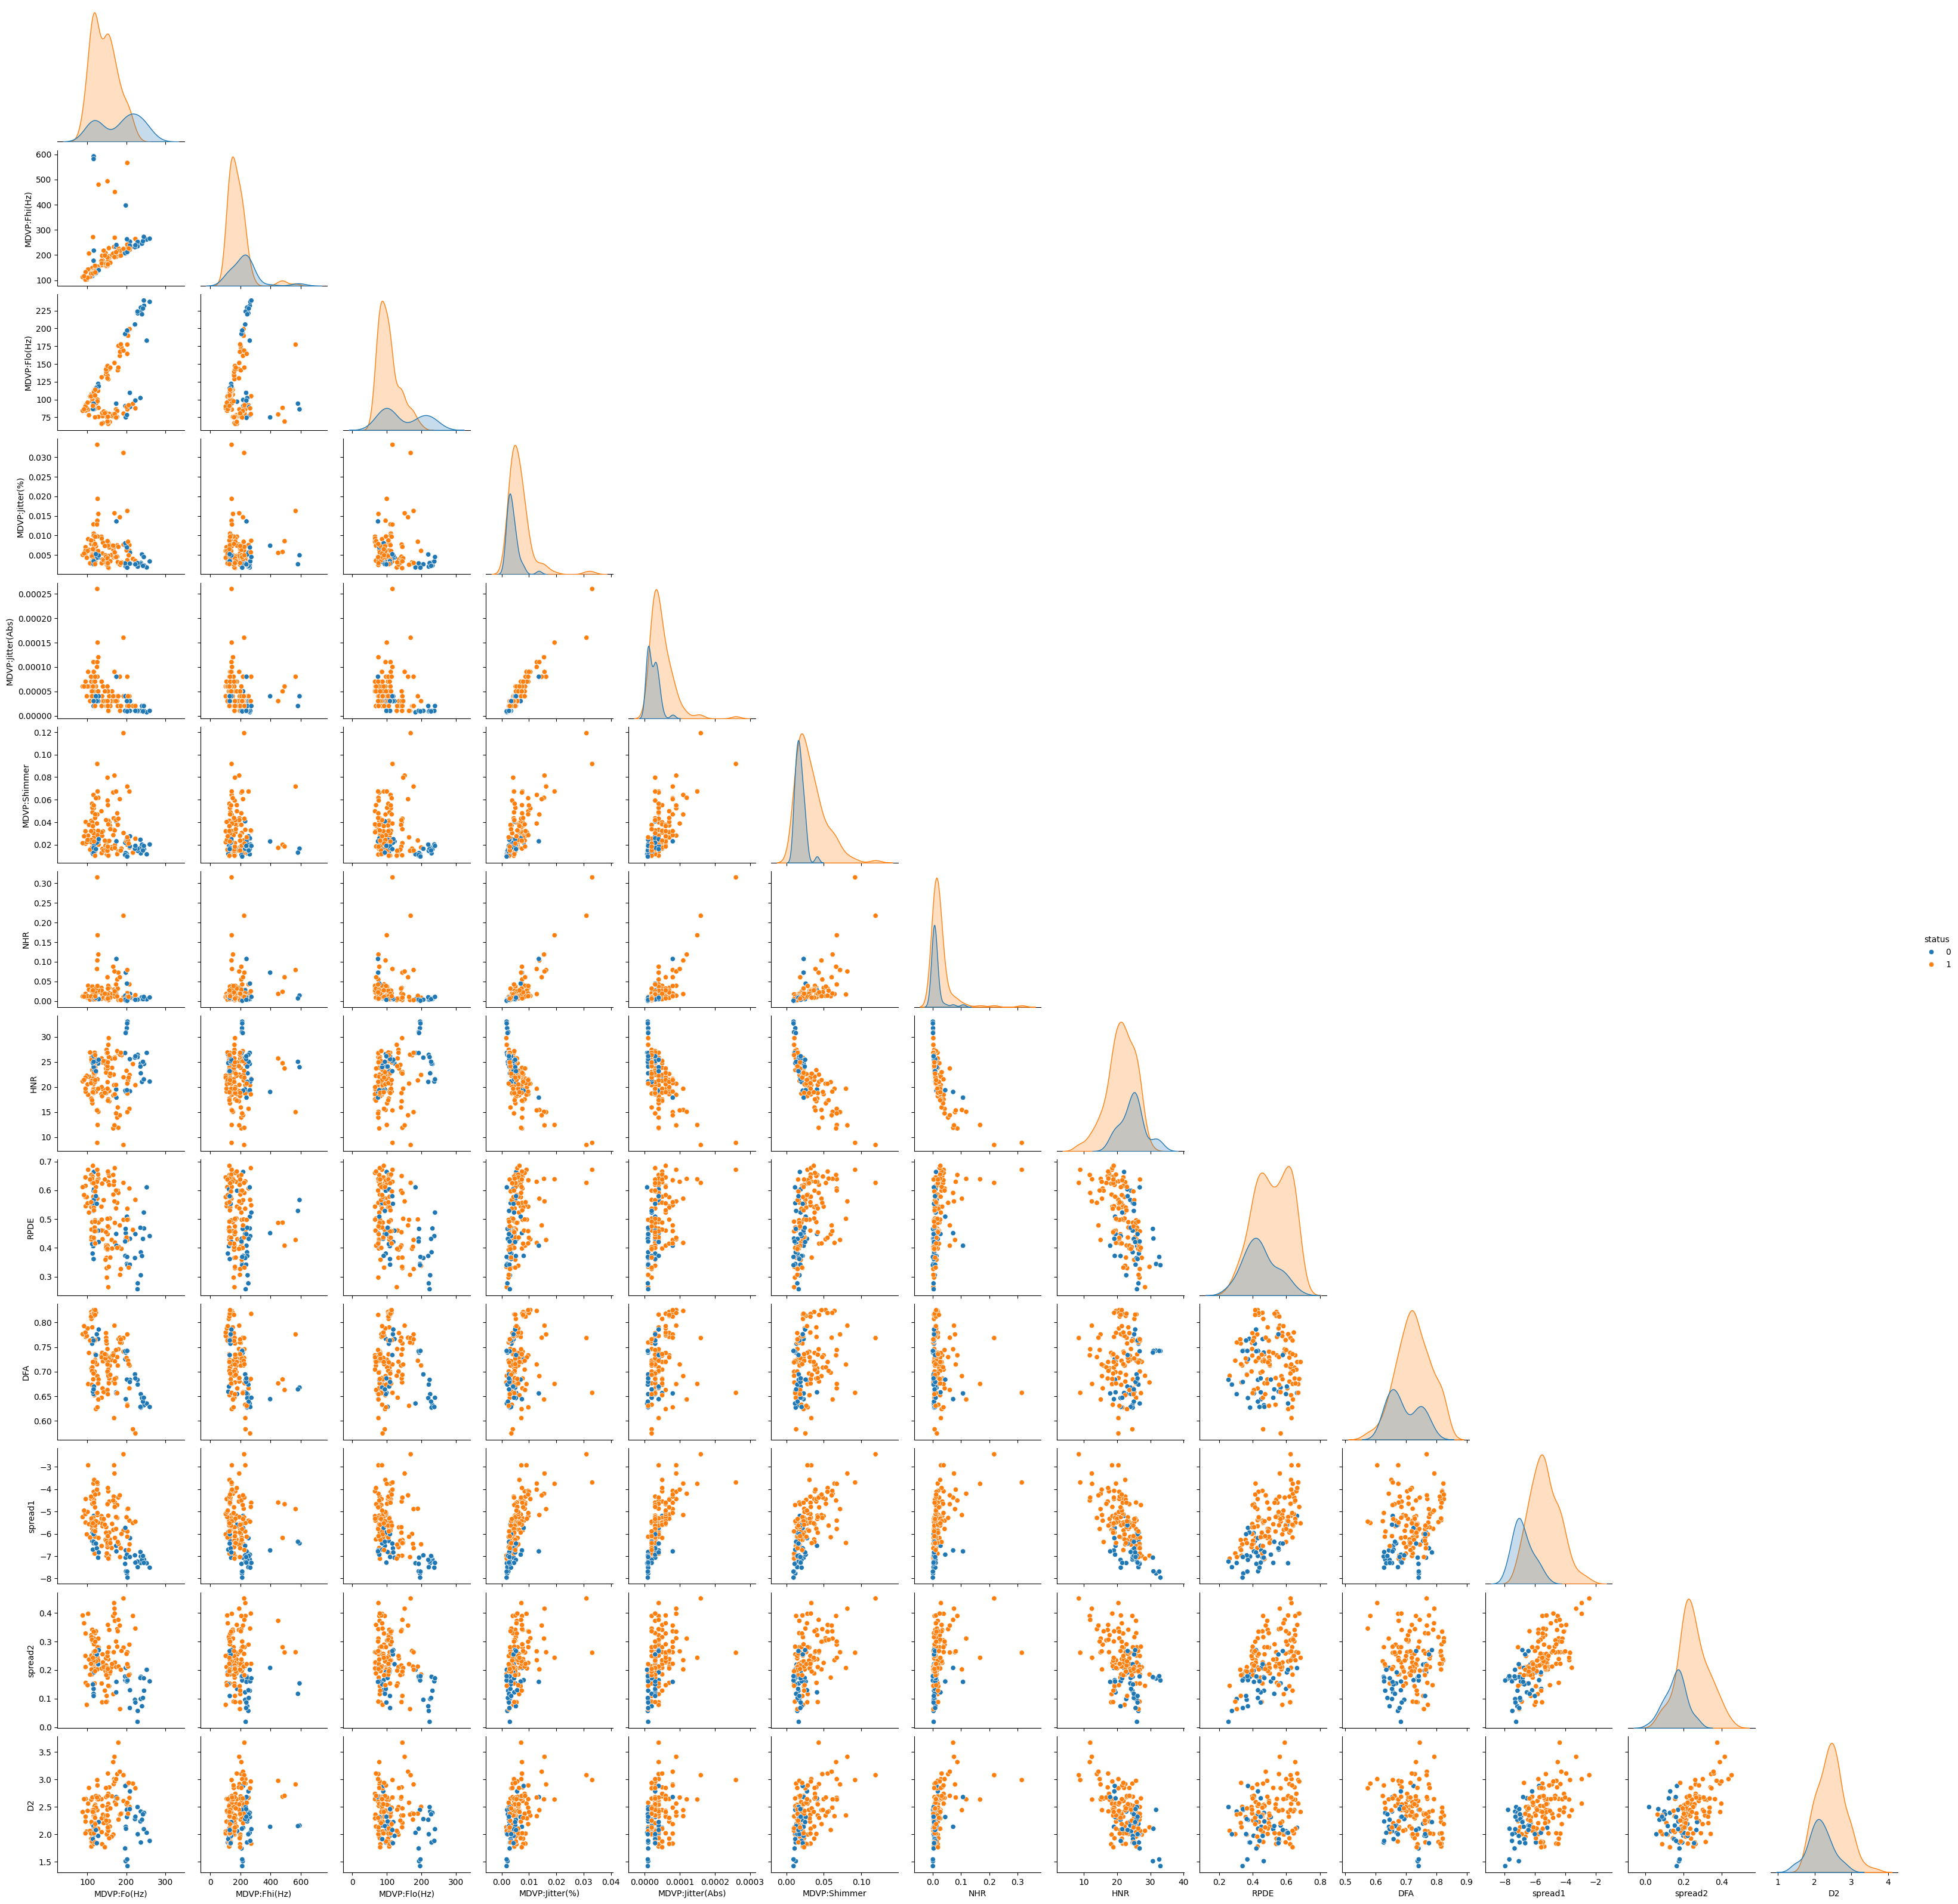

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# יצירת הגרפים ולשם בחירת המשתנים המיטיביים לחיזוי
sns.pairplot(df, hue='status', diag_kind= "kde", corner= True)
plt.show()


## 3. **Scale the data:**

   Apply the `MinMaxScaler` to scale the two input columns to a range between 0 and 1.  


In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(df[['spread1', 'MDVP:Jitter(Abs)']])

## 4. **Split the data:**

   Divide the dataset into a training set and a validation set.





## 5. **Choose a model:**  

   Select a model to train on the data.  

   #### Advice:  
   - Consider using the model discussed in the paper from the GitHub repository as a reference.  


# 6. **Test the accuracy:**  

   Evaluate the model's accuracy on the test set. Ensure that the accuracy is at least **0.8**.  


## 7. **Save and upload the model:**  

   After you are happy with your results, save the model with the `.joblib` extension and upload it to your GitHub repository main folder.
   
   Additionally, update the `config.yaml` file with the list of selected features and the model's joblib file name.  


example:  
```yaml
selected_features: ["A", "B"]  
path: "my_model.joblib"  
```

In [ ]:
import joblib

joblib.dump(model, 'my_model.joblib')

## 8. **Copy the code:**  

   Copy and paste all the code from this notebook into a `main.py` file in the GitHub repository.  
